# 1. Importação das Bibliotecas

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import numpy as np

## Carregando o Dataset

In [120]:
elnino_data = sm.datasets.elnino.load_pandas().data
print("Primeiras linhas do dataset:")
print(elnino_data.head())

Primeiras linhas do dataset:
     YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0  1950.0  23.11  24.20  25.37  23.86  23.03  21.57  20.63  20.15  19.67   
1  1951.0  24.19  25.28  25.60  25.37  24.79  24.69  23.86  22.32  21.44   
2  1952.0  24.52  26.21  26.37  24.73  23.71  22.34  20.89  20.02  19.63   
3  1953.0  24.15  26.34  27.36  27.03  25.47  23.49  22.20  21.45  21.25   
4  1954.0  23.02  25.00  25.33  22.97  21.73  20.77  19.52  19.33  18.95   

     OCT    NOV    DEC  
0  20.03  20.02  21.80  
1  21.77  22.33  22.89  
2  20.40  20.77  22.39  
3  20.95  21.60  22.44  
4  19.11  20.27  21.30  


## Calculando a média anual dos valores mensais (de JAN a DEC)

In [121]:
elnino_data['mean'] = elnino_data.iloc[:, 1:].mean(axis=1)

## Criando uma série temporal com 'YEAR' como índice

In [122]:
elnino_series = pd.Series(elnino_data['mean'].values, index=elnino_data['YEAR'])

# 2. Exploração e Visualização Inicial

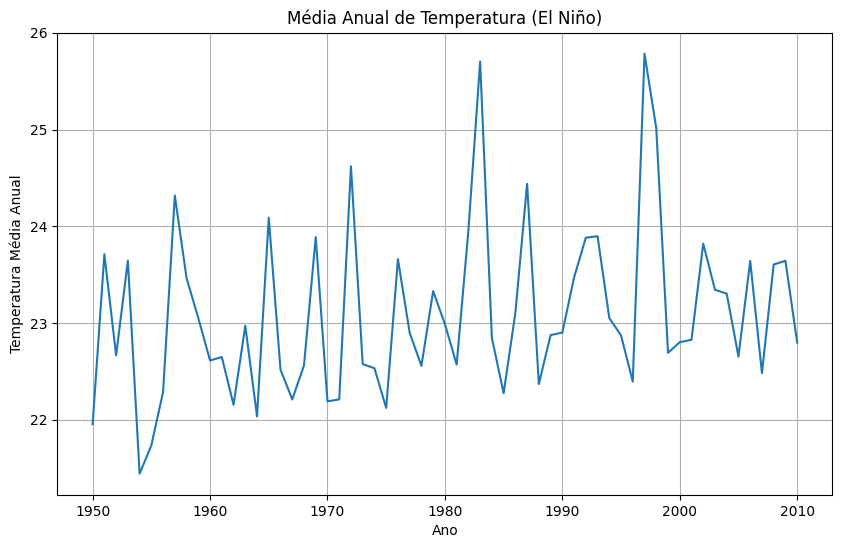

In [123]:
import matplotlib.pyplot as plt

elnino_series.plot(title='Média Anual de Temperatura (El Niño)', figsize=(10,6))
plt.xlabel('Ano')
plt.ylabel('Temperatura Média Anual')
plt.grid(True)
plt.show()

# 3. Análise de Estacionariedade e Decomposição

In [124]:
# Teste ADF (Dickey-Fuller Aumentado)
print("\nTeste ADF para a série original:")
adf_stat, adf_p_value, _, _, adf_crit_values, _ = adfuller(elnino_series)
print(f'Estatística do teste ADF: {adf_stat:.4f}')
print(f'p-valor: {adf_p_value:.4f}')
print('Valores Críticos:')
for key, value in adf_crit_values.items():
    print(f'{key}: {value:.4f}')

# Teste KPSS
print("\nTeste KPSS para a série original:")
kpss_stat, kpss_p_value, _, kpss_crit_values = kpss(elnino_series, regression='c', nlags="auto")
print(f'Estatística do teste KPSS: {kpss_stat:.4f}')
print(f'p-valor: {kpss_p_value:.4f}')
print('Valores Críticos:')
for key, value in kpss_crit_values.items():
    print(f'{key}: {value:.4f}')


Teste ADF para a série original:
Estatística do teste ADF: -6.4510
p-valor: 0.0000
Valores Críticos:
1%: -3.5464
5%: -2.9119
10%: -2.5937

Teste KPSS para a série original:
Estatística do teste KPSS: 0.6236
p-valor: 0.0205
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


## Decomposição da série temporal

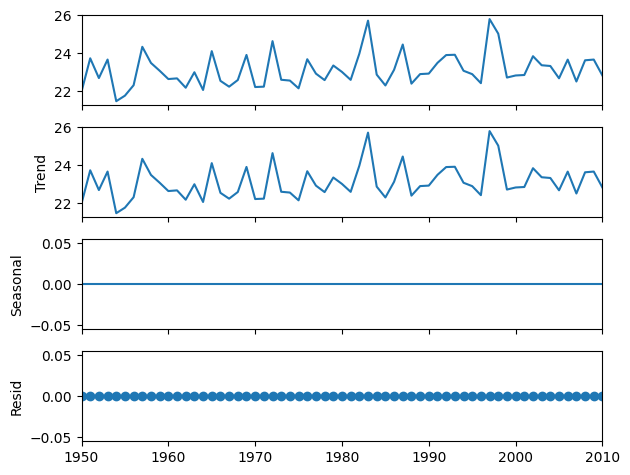

In [125]:
decomposition = seasonal_decompose(elnino_series, model='additive', period=1)  # Ajuste o "period" conforme necessário
decomposition.plot()
plt.show()

4. Transformações e Diferenças

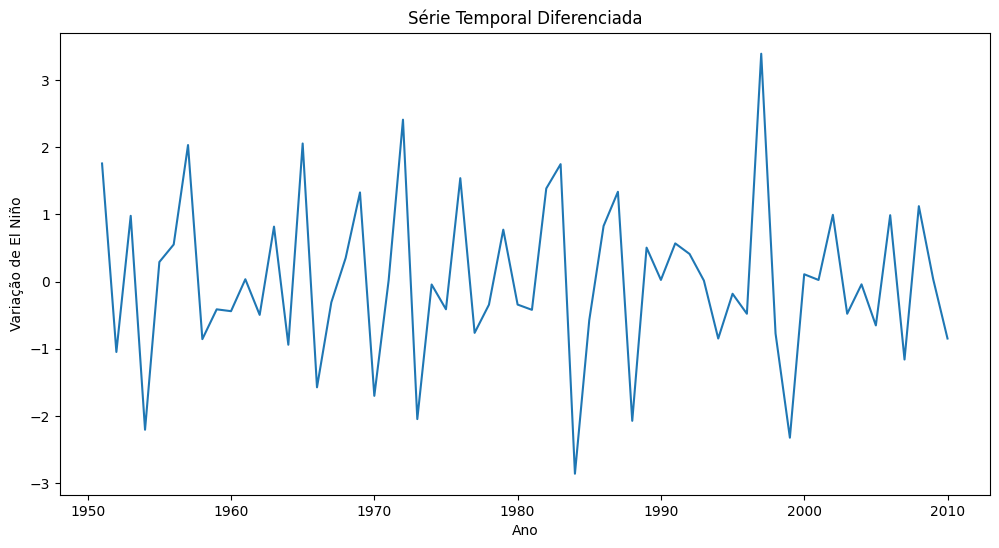

In [126]:
elnino_diff = elnino_series.diff().dropna()

# Visualizar a série diferenciada
elnino_diff.plot(title='Série Temporal Diferenciada', figsize=(12,6))
plt.xlabel('Ano')
plt.ylabel('Variação de El Niño')
plt.show()

## Verificando estacionariedade após a diferença

In [127]:
print("Teste ADF para a série diferenciada:")
adf_stat, adf_p_value, _, _, adf_crit_values, _ = adfuller(elnino_diff)
print(f'Estatística do teste ADF: {adf_stat:.4f}')
print(f'p-valor: {adf_p_value:.4f}')
print('Valores Críticos:')
for key, value in adf_crit_values.items():
    print(f'{key}: {value:.4f}')

Teste ADF para a série diferenciada:
Estatística do teste ADF: -6.5324
p-valor: 0.0000
Valores Críticos:
1%: -3.5577
5%: -2.9168
10%: -2.5962


5. Identificação do Modelo Adequado

In [128]:
model = auto_arima(elnino_series, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=197.541, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=191.728, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=195.549, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=185.551, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=170.418, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=171.029, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=168.430, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=183.571, Time=0.01 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=169.055, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=158.664, Time=0.04 sec
 A

In [129]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   61
Model:               SARIMAX(3, 1, 1)   Log Likelihood                 -74.332
Date:                Tue, 07 Jan 2025   AIC                            158.664
Time:                        18:04:52   BIC                            169.135
Sample:                             0   HQIC                           162.760
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1453      0.148     -0.981      0.327      -0.436       0.145
ar.L2         -0.3374      0.187     -1.805      0.071      -0.704       0.029
ar.L3         -0.2838      0.157     -1.808      0.0

6. Treinamento do Modelo e Predição

In [130]:
# Dividindo os dados em treino e teste
train = elnino_series.iloc[:-10]
test = elnino_series.iloc[-10:]

In [131]:
# Ajustando o modelo ao conjunto de treino
model.fit(train)

ARIMA(order=(3, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [141]:
forecast = model.predict(n_periods=len(test))

c:\Users\Kesley\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Kesley\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [142]:
# Concatenando valores reais e previsões para visualização completa
extended_index = elnino_series.index.tolist() + [elnino_series.index[-1] + i for i in range(1, 11)]
extended_series = pd.Series(data=np.concatenate([elnino_series.values, forecast]), index=extended_index)

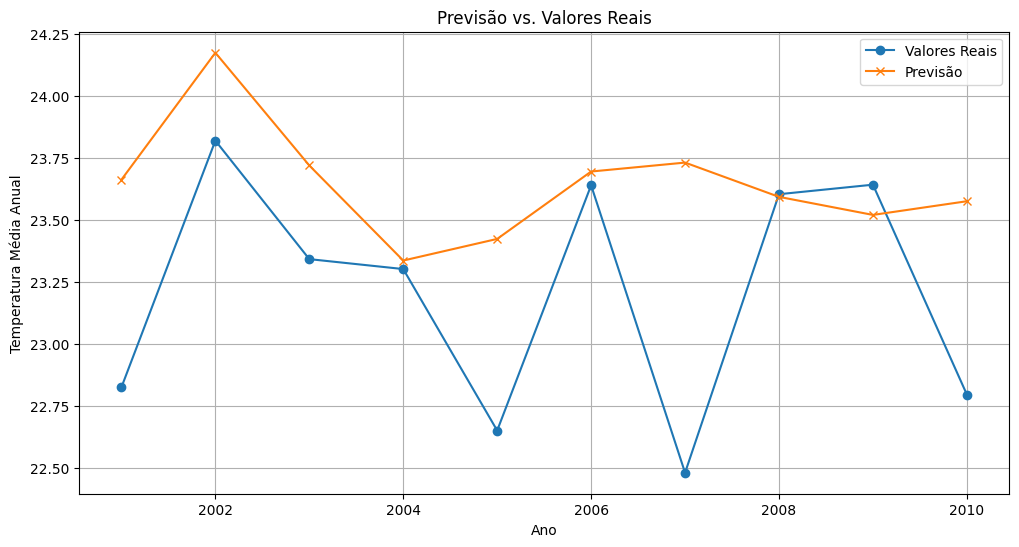

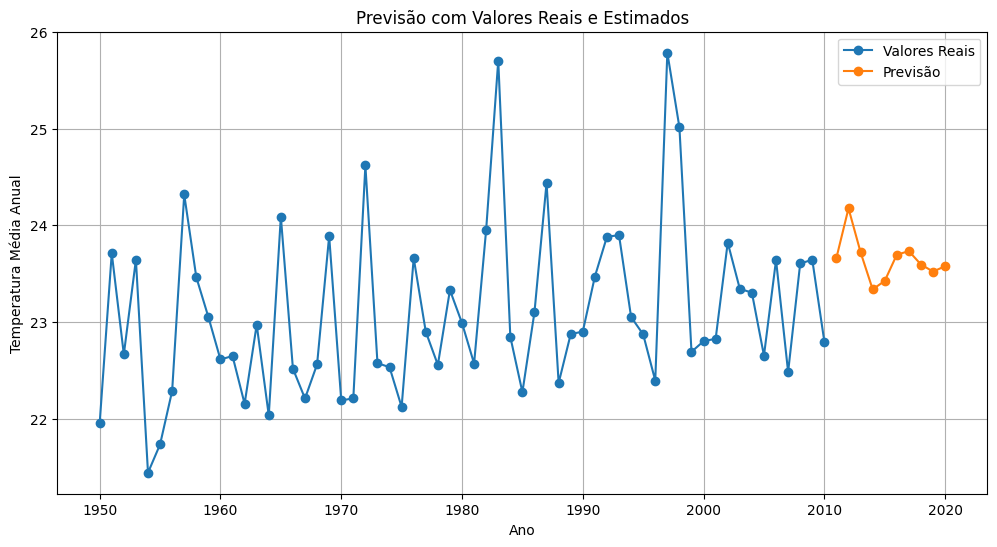

In [149]:
# Visualizando previsões vs. valores reais
plt.figure(figsize=(12,6))
plt.plot(elnino_series.index, elnino_series.values, label='Valores Reais', marker='o')
plt.plot(extended_series.index[-10:], extended_series.values[-10:], label='Previsão', marker='o')
plt.title('Previsão com Valores Reais e Estimados')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média Anual')
plt.legend()
plt.grid(True)
plt.show()



7. Avaliação do Modelo

In [144]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse:.4f}')


RMSE: 0.6127
